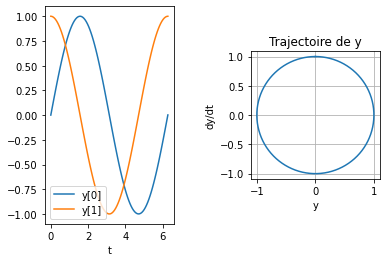

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#definition du système différentiel
# y[0] = y
# y[1] = y'
# y" = -y s'écrit y[0]' = y[1] et y[1]' = -y[0] 

def systeme(t, y):
    return [y[1], -y[0]]

t_span = [0, 2*np.pi]  # Intervalle de temps (une période)
y0 = [0, 1]  # Conditions initiales

#résolution du système sur une période
sol = solve_ivp(systeme, t_span, y0, t_eval=np.linspace(0, 2*np.pi, 100), method='RK45')
t = sol.t
y = sol.y
#tracé des figures
plt.subplot(121)
plt.plot(t,y[0])
plt.plot(t,y[1])
plt.xlabel('t')
plt.legend(['y[0]','y[1]'] )
plt.subplot(122)
plt.plot(y[0], y[1])
plt.gca().set_aspect('equal', adjustable='box')  # Définit les échelles des axes x et y égales
plt.xlabel('y')
plt.ylabel('dy/dt',)
plt.title('Trajectoire de y')
plt.grid(True)
plt.subplots_adjust(wspace=0.6)# écarte un peu  les deux figures
plt.show()


On obtient bien un cercle dans le plan des phases $(y,y')$.
On a en effet $$y^2(t) + y'^2(t) \equiv 1.$$
En effet $$\frac{d}{dt} (y^2(t) + y'^2(t)) =  2 y'(t)(y(t) + y"(t)) =0. $$
Donc $$y^2(t) + y'^2(t) = y^2(0) + y'^2(0)=1.$$
Ici bien sûr $y(t) = \sin t$ et $y'(t) = \cos t$.

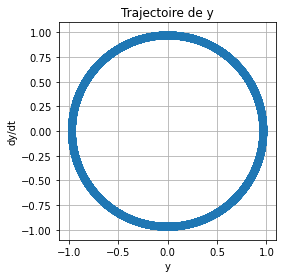

In [2]:
t_span = [0, 2000*np.pi]  # Intervalle de temps (mille périodes)
y0 = [0, 1]  # Conditions initiales

#résolution du système sur mille périodes
sol = solve_ivp(systeme, t_span, y0, t_eval=np.linspace(0, 2000*np.pi, 200000), method='RK45')
y = sol.y
#tracé des figures
plt.plot(y[0], y[1])
plt.gca().set_aspect('equal', adjustable='box')  # Définit les échelles des axes x et y égales
plt.xlabel('y')
plt.ylabel('dy/dt',)
plt.title('Trajectoire de y')
plt.grid(True)
plt.show()

On constate que le cercle s'épaissit. Les trajectoires ne se referment pas exactement, le schéma discret ne conserve pas l'intégrale première. Il perd peu à peu de l'énergie alors que le système différentiel continu n'en perd pas.

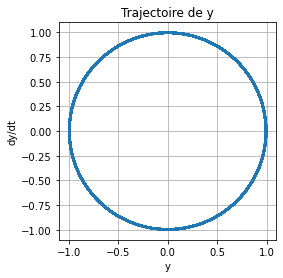

In [3]:
t_span = [0, 2000*np.pi]  # Intervalle de temps (une période)
y0 = [0, 1]  # Conditions initiales

#résolution du système sur mille période
sol = solve_ivp(systeme, t_span, y0, t_eval=np.linspace(0, 2000*np.pi, 200000), method='RK45', rtol=1e-5)
y = sol.y
#tracé des figures
plt.plot(y[0], y[1])
plt.gca().set_aspect('equal', adjustable='box')  # Définit les échelles des axes x et y égales
plt.xlabel('y')
plt.ylabel('dy/dt',)
plt.title('Trajectoire de y')
plt.grid(True)
plt.show()

En augmentant la précision, le problème s'est atténué mais il n'a pas disparu. D'ailleurs si on refait la simulation sur 10 000 périodes, on retrouve l'épaississement du cercle.

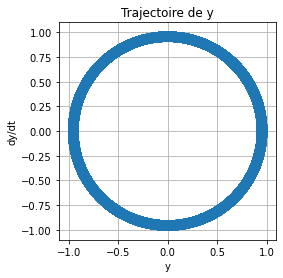

In [4]:
t_span = [0, 20000*np.pi]  # Intervalle de temps (une période)
y0 = [0, 1]  # Conditions initiales

#résolution du système sur mille période
sol = solve_ivp(systeme, t_span, y0, t_eval=np.linspace(0, 20000*np.pi, 2000000), method='RK45', rtol=1e-5)
y = sol.y
#tracé des figures
plt.plot(y[0], y[1])
plt.gca().set_aspect('equal', adjustable='box')  # Définit les échelles des axes x et y égales
plt.xlabel('y')
plt.ylabel('dy/dt',)
plt.title('Trajectoire de y')
plt.grid(True)
plt.show()

# Schéma implicite-explicite

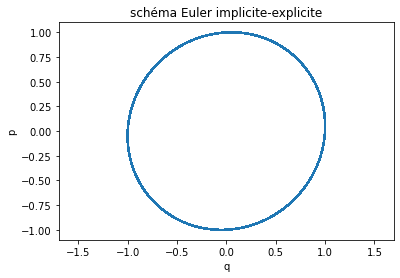

In [5]:
# duree de simulation
T = 20000*np.pi
# pas
h = 1e-1
# nombre de points de la subdivision
N = int(T/h)
q = np.zeros(N)
p = np.zeros(N)
# conditions initiales
q[0] = 0
p[0] = 1
# schéma Euler symplectique
# q_{n+1} = q_n + h p_{n+1}
# p_{n+1} = p_n - h q_n
for k in range(N-1):
    p[k+1] = p[k] - h*q[k]
    q[k+1] = q[k] + h*p[k+1]

plt.figure()
plt.plot(q, p, '-')
plt.axis('equal')
plt.xlabel('q')
plt.ylabel('p')
plt.title('schéma Euler implicite-explicite')
plt.show()

Le problème est résolu, même avec un pas très grossier. Le schéma implicite-explicite conserve l'énergie, même si on simule sur dix mille périodes. C'est pourtant un schéma d'ordre 1 seulement comme le schéma d'Euler. L'ordre d'un schéma garantit sa précision mais pas la conservation des invariants du système. Les schémas qui respectent les invariants naturels du système sont dits ***symplectiques.***